In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

data = pd.read_csv('square.csv')

X = data[['x']].values
y = data['y'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# input parameters
input_size = X_train.shape[1] 
hidden_size = 10
output_size = 1 
# Initialize
V = np.random.randn(hidden_size, input_size) * 0.01
W = np.random.randn(output_size, hidden_size) * 0.01 

bias_hidden = np.zeros((hidden_size, 1))
bias_output = np.zeros((output_size, 1))


eta = 0.1

# Training the network
epochs = 10000

for epoch in range(epochs):
    for i in range(X_train.shape[0]):
        
        input_vector = X_train[i].reshape(-1, 1)
        desired_output = y_train[i].reshape(-1, 1)

        # feedforward
        net_hidden = np.dot(V, input_vector) + bias_hidden
        y_hidden = sigmoid(net_hidden)

        net_output = np.dot(W, y_hidden) + bias_output
        o = sigmoid(net_output)

        # error
        error_output = desired_output - o 

        # backpropagation
        delta_output = error_output * sigmoid_derivative(o)
        delta_hidden = np.dot(W.T, delta_output) * sigmoid_derivative(y_hidden) 

        # update weights and biases
        W += eta * np.dot(delta_output, y_hidden.T) 
        V += eta * np.dot(delta_hidden, input_vector.T) 

        bias_output += eta * delta_output
        bias_hidden += eta * delta_hidden

    # Optionally, print the error at intervals
    if epoch % 1000 == 0:
        cumulative_error = np.mean(np.abs(error_output))
        print(f'Epoch {epoch}, Error: {cumulative_error}')





def predict(X):
    predictions = []
    for i in range(X.shape[0]):
        input_vector = X[i].reshape(-1, 1)
        net_hidden = np.dot(V, input_vector) + bias_hidden
        y_hidden = sigmoid(net_hidden)
        net_output = np.dot(W, y_hidden) + bias_output
        o = sigmoid(net_output)
        predictions.append(int(o > 0.5))
    return np.array(predictions).reshape(-1, 1)

# Predict on test data
y_pred = predict(X_test)

# accuracy
accuracy = np.mean(y_pred == y_test) * 100
print(f'Accuracy: {accuracy:.2f}%')


print("prediction output on the test data:")
for i in range(X_test.shape[0]):
    input_vector = X_test[i].reshape(-1, 1)
    net_hidden = np.dot(V, input_vector) + bias_hidden
    y_hidden = sigmoid(net_hidden)
    net_output = np.dot(W, y_hidden) + bias_output
    o = sigmoid(net_output)
    print(f'Input: {X_test[i]} -> Predicted Placement: {int(o > 0.5)} (Actual: {y_test[i][0]})')



C:\Users\Kiran\AppData\Local\Temp\ipykernel_15196\3839862979.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 0, Error: 2703.0
Epoch 1000, Error: 2703.0
Epoch 2000, Error: 2703.0
Epoch 3000, Error: 2703.0
Epoch 4000, Error: 2703.0
Epoch 5000, Error: 2703.0
Epoch 6000, Error: 2703.0
Epoch 7000, Error: 2703.0
Epoch 8000, Error: 2703.0
Epoch 9000, Error: 2703.0
Accuracy: 5.00%
prediction output on the test data:
Input: [84] -> Predicted Placement: 1 (Actual: 7056)
Input: [54] -> Predicted Placement: 1 (Actual: 2916)
Input: [71] -> Predicted Placement: 1 (Actual: 5041)
Input: [46] -> Predicted Placement: 1 (Actual: 2116)
Input: [45] -> Predicted Placement: 1 (Actual: 2025)
Input: [40] -> Predicted Placement: 1 (Actual: 1600)
Input: [23] -> Predicted Placement: 1 (Actual: 529)
Input: [81] -> Predicted Placement: 1 (Actual: 6561)
Input: [11] -> Predicted Placement: 1 (Actual: 121)
Input: [1] -> Predicted Placement: 1 (Actual: 1)
Input: [19] -> Predicted Placement: 1 (Actual: 361)
Input: [31] -> Predicted Placement: 1 (Actual: 961)
Input: [74] -> Predicted Placement: 1 (Actual: 5476)
Input: [34

C:\Users\Kiran\AppData\Local\Temp\ipykernel_15196\3839862979.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predictions.append(int(o > 0.5))
C:\Users\Kiran\AppData\Local\Temp\ipykernel_15196\3839862979.py:97: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f'Input: {X_test[i]} -> Predicted Placement: {int(o > 0.5)} (Actual: {y_test[i][0]})')


In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.utils import plot_model



data = pd.read_csv('placement.csv')
X = data[['cgpa', 'resume_score']].values
y = data['placed'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# NN model define
model = Sequential([
    Dense(2, input_dim=2, activation='sigmoid'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer
])

learning_rate = 0.1
model.compile(
    optimizer=SGD(learning_rate=learning_rate),
    loss=BinaryCrossentropy(),
    metrics=[BinaryAccuracy()]
)

# Train model
epochs = 1000
model.fit(X_train, y_train, epochs=epochs, verbose=0)

accuracy = model.evaluate(X_test, y_test, verbose=0)[1] * 100
print(f'Accuracy: {accuracy:.2f}%')

y_pred = (model.predict(X_test) > 0.5).astype(int)

print("Prediction output on the test data:")
for i in range(X_test.shape[0]):
    print(f'Input: {X_test[i]} -> Predicted Placement: {y_pred[i][0]} (Actual: {y_test[i]})')

# Visualize the model
plot_model(model, show_shapes=True, show_layer_names=True)


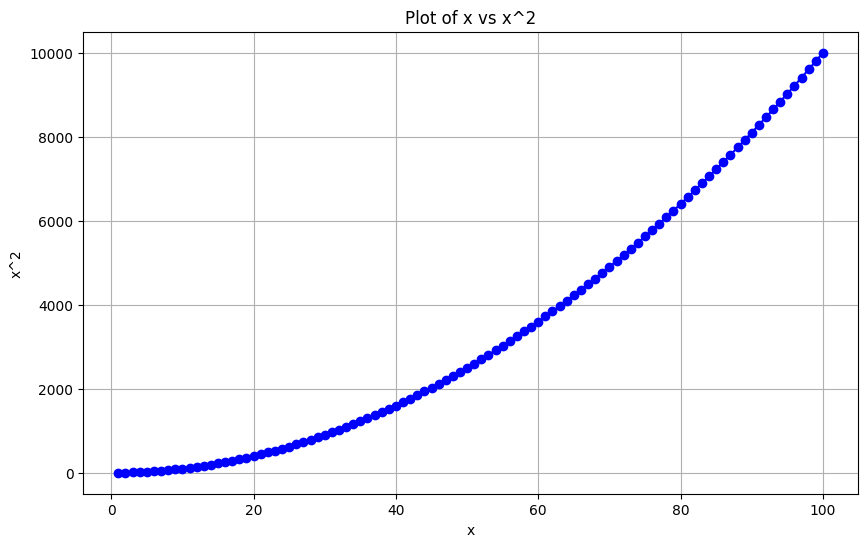

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
x = np.arange(1, 101)  # Numbers from 1 to 100
y = x**2               # Squares of numbers from 1 to 100

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-', color='b')

# Label the axes
plt.xlabel('x')
plt.ylabel('x^2')
plt.title('Plot of x vs x^2')

# Show the plot
plt.grid(True)
plt.show()


Epoch 1/100


c:\Users\Kiran\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.1875 - val_loss: 0.0989
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1341 - val_loss: 0.0751
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1112 - val_loss: 0.0575
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0891 - val_loss: 0.0445
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0608 - val_loss: 0.0347
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0581 - val_loss: 0.0277
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0406 - val_loss: 0.0232
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0350 - val_loss: 0.0208
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0293 - val_loss: 0.0196
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0264 - val_loss: 0.0192
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0248 - val_loss: 0.0190
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0237 - val_loss: 0.0187
E

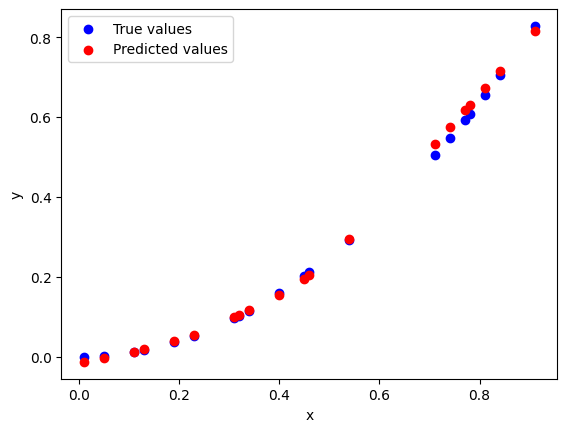

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.7236e-04
Mean Squared Error on Test Data: 0.00017235640552826226


In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# Input data
x = np.arange(1, 101)
y = x**2

# Normalize the data (optional, but often useful)
x = x / 100.0
y = y / np.max(y)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = Sequential([
    Dense(64, input_dim=1, activation='relu'),  # First hidden layer with 64 neurons and ReLU activation
    Dense(32, activation='relu'),               # Second hidden layer with 32 neurons and ReLU activation
    Dense(1)                                    # Output layer with a single neuron (for regression)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))
# Predicting values
y_pred = model.predict(x_test)

# Plot the true values and predictions
plt.scatter(x_test, y_test, color='blue', label='True values')
plt.scatter(x_test, y_pred, color='red', label='Predicted values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Evaluate model performance
loss = model.evaluate(x_test, y_test)
print(f"Mean Squared Error on Test Data: {loss}")


Epoch 0, Loss: 2366.6214493637594
Epoch 1000, Loss: 87.33491097920512
Epoch 2000, Loss: 40.629391563531605
Epoch 3000, Loss: 21.63487765332785
Epoch 4000, Loss: 13.45530683411414
Epoch 5000, Loss: 9.62073868040939
Epoch 6000, Loss: 7.5307032768772775
Epoch 7000, Loss: 6.244204531921898
Epoch 8000, Loss: 5.396336847499185
Epoch 9000, Loss: 4.813760756276559


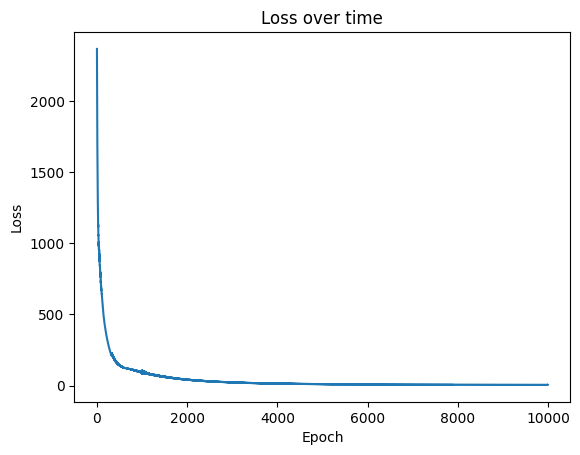

Test Inputs: [   5   -3    2 1000]
Expected Outputs: [     25       9       4 1000000]
Predicted Outputs: [ 25.05098282   7.45178789   3.47678114 100.5115897 ]


C:\Users\Kiran\AppData\Local\Temp\ipykernel_11620\4011357141.py:21: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-10, 10, 100)  
y = X**2  

np.random.seed(42)  

input_size = 1
hidden_size = 10
output_size = 1

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))

W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def forward_pass(X):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    return z2, a1

def compute_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def backward_pass(X, y, y_pred, a1, learning_rate=0.01):
    global W1, b1, W2, b2
    
    m = X.shape[0]
    
    dz2 = y_pred - y
    dW2 = np.dot(a1.T, dz2) / m
    db2 = np.sum(dz2, axis=0, keepdims=True) / m
    
    dz1 = np.dot(dz2, W2.T) * sigmoid_derivative(a1)
    dW1 = np.dot(X.T, dz1) / m
    db1 = np.sum(dz1, axis=0, keepdims=True) / m
    
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

epochs = 10000
losses = []

for epoch in range(epochs):
    y_pred, a1 = forward_pass(X.reshape(-1, 1))
    loss = compute_loss(y.reshape(-1, 1), y_pred)
    losses.append(loss)
    
    backward_pass(X.reshape(-1, 1), y.reshape(-1, 1), y_pred, a1)
    
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over time')
plt.show()


X_test = np.array([5, -3, 2, 1000])
y_test = X_test**2

y_pred_test, _ = forward_pass(X_test.reshape(-1, 1))

print("Test Inputs:", X_test)
print("Expected Outputs:", y_test)
print("Predicted Outputs:", y_pred_test.flatten())